**Notebook zur Klimastation**

Version 1.0, 30. Juni 2023, Informatik, EAH Jena

(c) Christina B. Class


# Vorwort

In diesem Notebook werden Sie Daten der EAH Klimastation lesen, statistische Informationen berechnen und darstellen und einige Temperaturplots erzeugen. Das, was Sie hier anwenden werden, ist nicht prüfungsrelevnat.

Dieses Notebook vermittelt hoffentlich Kenntnisse, die Sie für Ihr weiteres Studium nutzen können.

Ich wünsche Ihnen viel Freude damit!


Wir werden Mehoden und Funktionen aus den Modulen `numpy` und `matplotlib.pyplot` verwenden. Diese Module importieren wir mit den folgenden Zeilen:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Die EAH Klimastation

Die **klimatologische Messstation** an der Ernst-Abbe-Hochschule Jena wurde im Juni 1999 in Betrieb genommen. Seitdem wird hier das lokale Klima registriert. Die aktuellen Daten sowie zahlreiche Informationen zur Messtechnik werden im Internet präsentiert. Die Station konnte mehrfach erweitert werden. Inzwischen werden folgende Klimagrößen erfasst:

Lufttemperatur, relative Luftfeuchte, Niederschlag, Luftdruck, Windgeschwindigkeit, Windrichtung, Globalstrahlung, UV-A / UV-B, Sichtweite, Blitzaktivität

Alle 10 Minuten werden alle relevanten Messwerte gespeichert. Dies sind 52.000 Datensätze im Jahr.  

http://wetter.mb.eah-jena.de/station/index.html

Für unser Praktikum haben wir Temperaturmessdaten von 2022 erhalten.

# Laden der Daten


Die Daten der EAH Klimastation liegen in einer Excel Datei vor. Hier werden Sie automatisch abgespeichert. Für dieses Notebook wurden die Daten vorverarbeitet, d.h. wir arbeiten hier nicht mit den Originaldaten.

Die Daten, die ich erhalten habe, verwenden deutsche Kommazahlen. Python verwendet jedoch den `.`, hier musste ich die Messwerte in einem anderen Format abspeichern.

Das Datum in der Klimastation wird als 01.01.22 angegeben. Dies ist kein gültiges Zahlenformat. Die Uhrzeit wird mit : angegeben. Auch dies ist kein gültiges Zahlenformat. Mit `numpy` kann man die Daten daher nicht direkt einlesen. Ich habe also ein Skript geschrieben, das eine **csv**  Datei erstellt, die man in `numpy` direkt einlesen kann. Um die Datums und Uhrzeitangaben in Form von Zahlen darzustellen, habe ich neue Spalten erzeugt.

csv ist ein Dateiformat, das eine Tabelle in Form einer Textdatei spezifiziert, in der jede Tabellenzeile in einer separaten Zeile abgespeichert wird. Die einzelnen Zellen werden durch Kommata getrennt. Deswegen heißt das Format csv (comma separated values). Viele Sprachen, die zur Datenverarbeitung und Analyse genutzt werden, so Python, Matlab, R, aber Programme z.Bsp. zu Data Mining (RapidMiner, Weka, etc) stellen Funktionen zur Verfügung, um csv Dateien einfach einzulesen bzw zu schreiben. 

Die csv Datei nach der Vorverarbeitung besteht aus folgenden Spalten:

- Jahr
- Monat 
- Tag
- Stunde
- Minute
- Sekunde
- Temperatur

**Hinweis:** Es kommt häufiger vor, dass die Daten, die Ihnen vorliegen, nicht direkt verarbeitet werden können. Sehen Sie sie sich daher zuerst an, Ggf müssen Sie noch einige Umwandlungen vornehmen, bevor Sie die Daten mit Python, Matlab oder anderem verarbeiten können.

In `numpy` gibt es eine Funktion, die es ermöglicht, eine csv  Datei direkt einzulesen. In der csv Datei, die Sie von mir erhalten, hat es in der ersten Zeile Spaltenüberschriften drin. Diese Zeile werden wir beim Einlesen daher ignorieren.

Laden Sie die Datei `data/temperatur2022.csv` auf Ihren Rechner herunter und sehen Sie sie sich an. Verwenden Sie hierzu LibreOffice Calc und nicht Excel (das wird je nach Spracheinstellung Probleme haben, weil wir einen `.` und kein Komma für die Kommazahlen verwenden.

Laden Sie nun die Temperaturdaten mit folgendem Befehl in ein `numpy` Array.

In [ ]:
dieDaten=np.genfromtxt('data/temperatur2022.csv',delimiter=',',skip_header=1)

In [ ]:
print(dieDaten.shape)

Wie Sie sehen können, haben wir 52560 Zeilen (Messungen). Jede Zeile besteht aus 7 Spalten.

Die Temperatur ist in der siebten Spalte (Index 6). Mit der folgenden Zeile geben wir die Durchschnittstemperatur des Jahres aus:

In [ ]:
print("Durchschnittstemperatur:", dieDaten[:,6].mean())

Wenn wir die Ausgabe auf zwei Nachkommastellen beschränken wollen, können wir die formatierte Ausgabe verwenden:

In [ ]:
ausgabe='{}: {:.2f}'
print(ausgabe.format('Durchschnittstemperatur',dieDaten[:,6].mean()))

**Aufgabe:**

Verwenden Sie die Methoden von `numpy` Arrays (Folien 56 und 57 des gesamten Foliensatzes) und geben Sie für 2022 die folgenden Werte aus:
- niedrigste Temperatur
- höchste Temperatur
- mittlere Temperatur
- Standardabweichung
- Varianz

In [ ]:
# Ihre Loesung

# "Reduktion"

Wir sind nun nicht an den Daten des gesamten Jahres 2022 interessiert, sondern nur an den Informationen des Monats Juni. Hierzu verwenden wir die **"Reduktion"**. Der Monat steht in der zweiten Spalte mit Index 1.

1. Wir erzeugen ein Array `zeilen`, das einen Eintrag `True` hat, wenn die entsprechende Zeile die 6 (Monat Juni) in der zweiten Spalte hat

In [ ]:
zeilen=dieDaten[:,1]==6

2. Wir überprüfen mit `shape`, dass das Array 52560 Einträge hat:

In [ ]:
zeilen.shape

3. Nun verwenden wir dieses Array `zeilen`, um ein neues `numpy` Array zu erzeugen, das nur Einträge des Juni hat:

In [ ]:
juniDaten=dieDaten[zeilen,:]

4. Geben Sie nun die folgenden Werte
- niedrigste Temperatur
- höchste Temperatur
- mittlere Temperatur
- Standardabweichung
- Varianz
für den Monat Juni aus.

In [ ]:
# Ihre Loesung
ausgabe='{}: {:.2f}'

# Wiederholung: Dateien

Im nächsten Schritt wollen wir Werte pro Monat in einer Datei abspeichern. Hierzu wiederholen wir noch einmal Dateien.

**Aufgabe:** 
- Lesen Sie den folgenden Code durch und versuchen Sie, ihn nachzuvollziehen. Ergänzen Sie Text in den Kommentaren.
- Lassen Sie den Code laufen. Öffnen Sie die Datei mit LibreOffice Calc und sehen Sie sie sich an.

In [ ]:
fpout=open('data/test.csv','w')                             #
fpout.write('wert1,wert2,wert3\n')                     #
werte='{:.2f},{:.2f},{:.2f}\n'                         #
fpout.write(werte.format(1,2,3))                       #
fpout.write(werte.format(10.1,20.1,30.1))              #
fpout.write(werte.format(100.1111,200.2222,300.3333))  #
fpout.close()                                          #

# Speichern von statistischer Information

Wir wollen nun die statistischen Informationen 
- niedrigste Temperatur
- höchste Temperatur
- mittlere Temperatur
- Standardabweichung
- Varianz
für das ganze Jahr sowie für jeden Monat in einer Datei abspeichern:

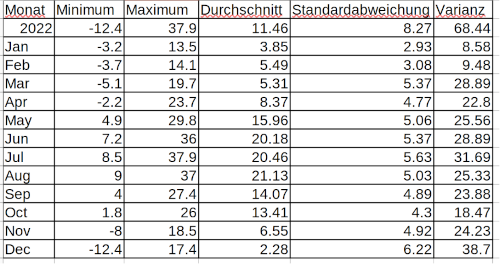

Hierzu erzeugen wir die erste Zeile mit den Spaltenüberschriften sowie eine Zeichenkette, um dann die einzelnen Werte formatiert abzuspeichern:

In [ ]:
ueberschriften='Monat,Minimum,Maximum,Durchschnitt,Standardabweichung,Varianz\n'
zeile='{},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f}\n'

**Aufgabe:**

Ergänzen Sie den folgenden Code wie in den Kommentaren angegeben, um die statistischen Informationen abzuspeichern: 

In [ ]:
ueberschriften='Monat,Minimum,Maximum,Durchschnitt,Standardabweichung,Varianz\n'
zeile='{},{:.2f},{:.2f},{:.2f},{:.2f},{:.2f}\n'
monatsnamen=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

dieDaten=np.genfromtxt('data/temperatur2022.csv',delimiter=',',skip_header=1)
datei=open('data/statistik2022.csv','w')

# Berechnen Sie die Werte für das gesamte Jahr 2022
# Ergaenzen Sie die 0 jeweils durch den entsprechenden Wert
minimum=0
maximum=0
durchschnitt=0
standardabweichung=0
varianz=0

datei.write(ueberschriften)
datei.write(zeile.format('2022',minimum,maximum,durchschnitt,standardabweichung,varianz))
            
# hier berechnen wir die Werte für die Monate
for mon in range(1,13):
    # erzeuge Daten nur für den entsprechenden Monat durch Reduktion
    # monat = .....
            
    # berechne die Werte für den entsprechenden Monat
    # ergaenzen Sie die 0 durch den entsprechenden Wert
    minimum=0
    maximum=0
    durchschnitt=0
    standardabweichung=0
    varianz=0
            
    # nun speichern wir die Werte
    datei.write(zeile.format(monatsnamen[mon-1],minimum,maximum,durchschnitt,standardabweichung,varianz))
                 
datei.close()

**Aufgabe:**

Öffnen Sie die Datei und vergleichen Sie die Werte mit der Abbildung oben.

# Boxplots

Aus den Temperaturdaten können wir einfach einen Boxplot erzeugen (durch `_=` verhindere ich die Anzeige der Rückgabewerte) :

In [ ]:
_=plt.boxplot(dieDaten[:,6])
plt.title('Temperaturen 2022')

Wir können natürlich auch Boxplots für verschiedene Monate darstellen.

Hierzu erzeuge ich im folgenden eine Liste, die Temperaturdaten vom Januar, Februar und März enthält

In [ ]:
temperaturen=[]
for i in range(1,4):
    zeilen=dieDaten[:,1]==i
    monat=dieDaten[zeilen,:]
    temperaturen.append(monat[:,6])

Hiervon erzeuge ich nun eine Abbildung mit den einzelnen Boxplots:

In [ ]:
_=plt.boxplot(temperaturen, labels=['Jan','Feb','Mar'])
plt.title('Temperaturen Januar bis März')

**Aufgabe:**

Erzeugen Sie wie oben eine Abbildung mit Boxplots aller 12 Monate des Jahres 2022.

In [ ]:
# Ihre Lösung

# Temperaturkurven

Für diese Aufgabe arbeiten wir nun nur mit den Daten des Monats Juni:

In [ ]:
dieDaten=np.genfromtxt('data/temperatur2022.csv',delimiter=',',skip_header=1)
zeilen=dieDaten[:,1]==6
juni2022=dieDaten[zeilen,:]

Wir wollen nun einen Plot für den 10. Juni erstellen. 

1. Hierzu müssen wir zuerst (per Reduktion) die Daten des 10. Juni erhalten. Der Tag steht in der dritten Spalte (index 2):

In [ ]:
zeilen=juni2022[:,2]==10
tag=juni2022[zeilen,:]

2. Und dann plotten wir den Tag:

In [ ]:
plt.plot(tag[:,6],label='10. Juni')
plt.legend()
plt.title('Temperatur')

In der $x$-Achse sehen wir nun die Nummer des Eintrags. Um die Uhrzeit darzustellen, braucht man etwas code. Den können Sie jeweils kopieren und übernehmen:

In [ ]:
minute=tag[:,4]*5/3
zeit=tag[:,3]*100+minute
plt.plot(zeit,tag[:,6],label='10. Juni')
plt.legend()
plt.title('Temperatur')

**Hinweis:** Und das versehen wir nun noch mit schönen Achsenbeschriftungen.

In [ ]:
# der Code für die Zeit
minute=tag[:,4]*5/3
zeit=tag[:,3]*100+minute
plt.plot(zeit,tag[:,6],label='10. Juni')
plt.legend()
plt.xticks(np.arange(100,2200,400),('1:00','5:00','9:00','13:00','17:00','21:00'))
# Achsenbeschriftungen
plt.xlabel('Uhrzeit')
plt.ylabel('Temperatur in Celsius')
plt.title('Temperatur')

**Aufgabe:**

Erzeugen Sie folgende Abbildung mit den Daten des 10. und 17. Juni (die Farben werden automatisch gesetzt):

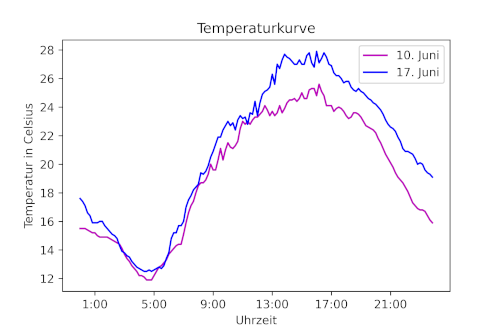

In [ ]:
# Ihre Loesung

# Alle Temperaturkurven des Juni

Im Dateibrowser sehen Sie einen Unterordner namens `plots`.
Wie setzen die untere und obere Grenzen für die $y$-Achse zu 5 bzw. 38. Diese Werte legen wir basierend auf der minimalen und maximalen Temperatur des Monats Juni fest.

Wie definieren eine Variable `datum`.

Beachten Sie den folgenden Code. Er erzeugt eine Abbildung für den 10. Juni, skaliert diese und speichert sie im Ordner `plots` ab.

In [ ]:
datum=10
zeilen=juni2022[:,2]==datum
tag=juni2022[zeilen,:]
# der Code für die Zeit
minute=tag[:,4]*5/3
zeit=tag[:,3]*100+minute
plt.plot(zeit,tag[:,6],label='10. Juni')
plt.legend()
plt.xticks(np.arange(100,2200,400),('1:00','5:00','9:00','13:00','17:00','21:00'))
plt.ylim((5,38))
# Achsenbeschriftungen
plt.xlabel('Uhrzeit')
plt.ylabel('Temperatur in Celsius')
plt.title('Temperatur')
plt.savefig('plots/juni_'+str(datum)+'.png',dpi=600)

**Aufgabe:** 

Verwenden Sie einen `for`-Schleife und erzeugen Sie analog zu obigem Code Temperaturkurven für alle Tage des Juni 2022.



In [ ]:
# Ihre Loesung

Bis alle Plots abgespeichert sind, dauert es zwar einen Moment, aber es ist doch sehr "bequem". 

**Aufgabe:**

Geben Sie in der Ordner `plots` und markieren Sie alle Dateien. Laden Sie dieser auf Ihren Rechner herunter und sehen Sie sich nacheinander die Abbildungen an. Sie können so einfach durch die Temperaturen des ganzen Monats durchklicken. Was können Sie feststellen? In welchen Fällen könnte es hilfreich sein, solche Abbildungen für einzelne Werte zu erzeugen? 

 In ähnlicher Weise können Sie mit Hilfe von Schleifen sehr einfach viele Plots von einzelnen Ergebnissen unterschiedlicher Messreichen oder ähnlichem erzeugen.

*Ende des Notebooks*

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Dieses Notebook wurde von Christina B. Class für die Lehre an der EAH Jena erstellt. Es ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Namensnennung - Nicht kommerziell - Keine Bearbeitungen 4.0 International Lizenz</a>.
